<a href="https://colab.research.google.com/github/ada612/Text-Classification-with-BERT-PyTorch/blob/master/bert_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytorch_transformers

     |████████████████████████████████| 176 kB 4.3 MB/s 
     |████████████████████████████████| 131 kB 29.5 MB/s 
     |████████████████████████████████| 895 kB 25.5 MB/s 
     |████████████████████████████████| 1.2 MB 49.1 MB/s 
     |████████████████████████████████| 8.5 MB 36.3 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 138 kB 46.3 MB/s 
     |████████████████████████████████| 127 kB 53.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
# df = pd.read_csv("/content/drive/MyDrive/AllSides Featured Headline Roundups AllSides.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/84pageAllSides Featured Headline Roundups AllSides.csv")
# df = df.append(df2)
# df.drop_duplicates(subset = ['title'],keep = 'first',inplace = True)
# df.to_csv("/content/drive/MyDrive/AllSides.csv")
# data1 = df[['article1summary','article1trend']]
# data2 = df[['article2summary','article2trend']]
# data3 = df[['article3summary','article3trend']]
# data1.columns = ['value','tag']
# data2.columns = ['value','tag']
# data3.columns = ['value','tag']
# data = data1.append(data2).append(data3)
# conditions = [(data['tag'].str.contains('Center')),(data['tag'].str.contains('Right')), (data['tag'].str.contains('Left'))]



# # data['trend'] = data.apply(lambda x: 1 if 'Center' in x['tag'] else 2 ) 


# data['tag'] = data['tag'].apply(lambda x: str(x).replace("\n","").strip())
# data = data[~(data['tag'].isin(['nan']))]
# values = [1,3,2]
# # conditions = [('Center' in data['tag']),('Right' in data['tag']), ('Left' in data['tag'])]
# conditions = [data['tag']=='From the Right',data['tag']=='From the Center',data['tag']=='From the Left']

# data['trend'] = np.select(conditions,values)
# data = data[['value','trend']]
# data.dropna(axis=0)

# # chooses = data[data['tag'].values=='nan'].index()
# # data.drop(chooses)
# # print(len(data))
# data['trend'].value_counts()
# # data['tag'].value_counts()
# # data.index = list(range(len(data)))
# # data['value'].astype(str)



dataset_file_path = '/content/drive/MyDrive/AllSides Featured Headline Roundups AllSides.csv'
dataset_file_path1 = '/content/drive/MyDrive/84pageAllSides Featured Headline Roundups AllSides.csv'
df = pd.read_csv(dataset_file_path)
df2 = pd.read_csv(dataset_file_path1)
df = df.append(df2)
df.drop_duplicates(subset=['title'], keep='first', inplace=True)
# data1 = df[['article1summary','article1trend']]
# data2 = df[['article2summary','article2trend']]
# data3 = df[['article3summary','article3trend']]
# data1.columns = ['value','tag']
# data2.columns = ['value','tag']
# data3.columns = ['value','tag']
# data = data1.append(data2).append(data3)
# data['tag'] = data['tag'].apply(lambda x: str(x).replace("\n","").strip())
# data['value'] = data['value'].apply(lambda x: str(x).replace("\n","").strip())
# data = data[~(data['tag'].isin(['nan']))]
# conditions = [data['tag']=='From the Right',data['tag']=='From the Center',data['tag']=='From the Left']
# #values = [1,2,3]
# values = [[1,0,0],[0,1,0],[0,0,1]]
# data['trend'] = np.select(conditions,values)
# df = data[['value','trend']]
# data['value'].astype(str)
# df.dropna(axis=0)
# df.index = list(range(len(df)))
# data['value'].value_counts()
data1 = df[['article1summary','article1trend']]
data2 = df[['article2summary','article2trend']]
data3 = df[['article3summary','article3trend']]
data1.columns = ['value','tag']
data2.columns = ['value','tag']
data3.columns = ['value','tag']
data = data1.append(data2).append(data3)
data['tag'] = data['tag'].apply(lambda x: str(x).replace("\n","").strip())
data['value'] = data['value'].apply(lambda x:str(x).replace("\n","").strip())
data = data[~(data['tag'].isin(['nan']))]
data = data[~(data['value'].isin(['nan']))]
binary_data = data[data['tag']=='From the Center']
data_size = int(np.floor(len(binary_data)*0.5))
binary_data_left = data[data['tag']=='From the Left']
binary_data_left.index = list(range(len(binary_data_left)))
binary_data_left = binary_data_left.iloc[:data_size]
binary_data_right = data[data['tag']=='From the Right']
binary_data_right.index = list(range(len(binary_data_right)))
binary_data_right = binary_data_right.iloc[:data_size]
data = binary_data.append(binary_data_left).append(binary_data_right)
conditions = [data['tag'].isin(['From the Right','From the Left']),data['tag']=='From the Center']
values = [1,0]
data['trend'] = np.select(conditions,values)
# df = data[['value','trend']]
data['valuelist'] = data['value'].apply(lambda x:str(x).split(" "))
data['counts']=data['valuelist'].apply(lambda x:len(x))
data['counts'].mean()
# data.groupby('trend')['counts'].mean()

trend
0    62.776387
1    87.618311
Name: counts, dtype: float64

In [ ]:
data['counts'].min()

3

In [ ]:
import random
import numpy as np
import os
import torch
import torch.nn as nn
from pytorch_transformers import BertModel, BertTokenizer, BertConfig, WarmupLinearSchedule
import re
import pandas as pd
#import json
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, SubsetRandomSampler
from tqdm import tqdm, trange

def seed_everything(seed = 42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# 初始化
seed_everything()

In [ ]:
# Constants

SEP_TOKEN = '[SEP]'
CLS_TOKEN = '[CLS]'
TRAIN_FILE_PATH = '/content/drive/MyDrive/AllSides Featured Headline Roundups AllSides.csv'
TRAIN_FILE_PATH2 = '/content/drive/MyDrive/84pageAllSides Featured Headline Roundups AllSides.csv'
MAX_SEQ_LENGTH = 512
BATCH_SIZE = 4
NUM_EPOCHS = 5
GRADIENT_ACCUMULATION_STEPS = 8
WARMUP_STEPS = 3
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [ ]:
#BERT模型
class BertClassifier(nn.Module):

    def __init__(self, config):
        super(BertClassifier, self).__init__()
        # Binary classification problem (num_labels = 3)
        self.num_labels = config.num_labels
        # Pre-trained BERT model
        self.bert = BertModel(config)
        # Dropout to avoid overfitting
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        # A single layer classifier added on top of BERT to fine tune for binary classification
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Weight initialization
        torch.nn.init.xavier_normal_(self.classifier.weight)

    def forward(self, input_ids, token_type_ids=None, attention_mask=None,
                position_ids=None, head_mask=None):
        # Forward pass through pre-trained BERT
        outputs = self.bert(input_ids, position_ids=position_ids, token_type_ids=token_type_ids,
                            attention_mask=attention_mask, head_mask=head_mask)
        
        # Last layer output (Total 12 layers)
        pooled_output = outputs[-1]

        pooled_output = self.dropout(pooled_output)
        return self.classifier(pooled_output)


In [ ]:
class SequenceDataset(Dataset):
    def __init__(self, dataset_file_path,dataset_file_path1, tokenizer, regex_transformations={}):
        # Read JSON file and assign to headlines variable (list of strings)
        #df = pd.read_json(dataset_file_path, lines=True)
        #读取数据
        df = pd.read_csv(dataset_file_path)
        df2 = pd.read_csv(dataset_file_path1)
        df = df.append(df2)
        df.drop_duplicates(subset=['title'], keep='first', inplace=True)
        data1 = df[['article1summary','article1trend']]
        data2 = df[['article2summary','article2trend']]
        data3 = df[['article3summary','article3trend']]
        data1.columns = ['value','tag']
        data2.columns = ['value','tag']
        data3.columns = ['value','tag']
        data = data1.append(data2).append(data3)
        data['tag'] = data['tag'].apply(lambda x: str(x).replace("\n","").strip())
        data = data[~(data['tag'].isin(['nan']))]
        conditions = [data['tag']=='From the Right',data['tag']=='From the Center',data['tag']=='From the Left']
        values = [0,1,2]
        data['trend'] = np.select(conditions,values)
        df = data[['value','trend']]

        # data['from_the_left'] = np.where(data['tag']=='From the Left',1,0)
        # data['from_the_center'] = np.where(data['tag']=='From the Center',1,0)
        # data['from_the_right'] = np.where(data['tag']=='From the Right',1,0)
        # df = data[['value','from_the_left','from_the_center','from_the_right']]
        
        data['value'].astype(str)
        df.dropna(axis=0)
        df.index = list(range(len(df)))

        #文本值
        self.headlines = df.value
        self.trends = df.trend

        # self.trends = df[['from_the_left','from_the_center','from_the_right']].values.tolist()
        # Regex Transformations can be used for data cleansing.
        # e.g. replace 
        #   '\n' -> ' ', 
        #   'wasn't -> was not
        self.regex_transformations = regex_transformations
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, index):
        headline = self.headlines[index]
        trend = self.trends[index]
        for regex, value_to_replace_with in self.regex_transformations.items():
            headline = re.sub(regex, value_to_replace_with, headline)
        # Convert input string into tokens with the special BERT Tokenizer which can handle out-of-vocabulary words using subgrams
        # e.g. headline = Here is the sentence I want embeddings for.
        #      tokens = [here, is, the, sentence, i, want, em, ##bed, ##ding, ##s, for, .]
        tokens = self.tokenizer.tokenize(str(headline))

        # Add [CLS] at the beginning and [SEP] at the end of the tokens list for classification problems
        tokens = [CLS_TOKEN] + tokens + [SEP_TOKEN]
        # Convert tokens to respective IDs from the vocabulary
        input_ids = self.tokenizer.convert_tokens_to_ids(tokens)

        # Segment ID for a single sequence in case of classification is 0. 
        segment_ids = [0] * len(input_ids)

        # Input mask where each valid token has mask = 1 and padding has mask = 0
        input_mask = [1] * len(input_ids)

        # padding_length is calculated to reach max_seq_length 未达到512则加0
        padding_length = MAX_SEQ_LENGTH - len(input_ids)
        input_ids = input_ids + [0] * padding_length
        input_mask = input_mask + [0] * padding_length
        segment_ids = segment_ids + [0] * padding_length

        assert len(input_ids) == MAX_SEQ_LENGTH
        assert len(input_mask) == MAX_SEQ_LENGTH
        assert len(segment_ids) == MAX_SEQ_LENGTH

        return torch.tensor(input_ids, dtype=torch.long, device=DEVICE), \
               torch.tensor(segment_ids, dtype=torch.long, device=DEVICE), \
               torch.tensor(input_mask, device=DEVICE), \
               torch.tensor(trend, dtype=torch.long, device=DEVICE)

In [ ]:
# Load BERT default config object and make necessary changes as per requirement
config = BertConfig(hidden_size=768,
                    num_hidden_layers=12,
                    num_attention_heads=12,
                    intermediate_size=3072,
                    #hidden_dropout_prob = 0.1,
                    num_labels=3)
#标签为3

# Create our custom BERTClassifier model object
model = BertClassifier(config)
model.to(DEVICE)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:00<00:00, 421691.24B/s]


In [ ]:
# Load Train dataset and split it into Train and Validation dataset
train_dataset = SequenceDataset(TRAIN_FILE_PATH,TRAIN_FILE_PATH2, tokenizer)

validation_split = 0.1
# test_split = 0.2
dataset_size = len(train_dataset)
indices = list(range(dataset_size))
val_split = int(np.floor(validation_split * dataset_size))
# tes_split = int(np.floor(test_split * dataset_size))
shuffle_dataset = True

if shuffle_dataset :
    np.random.shuffle(indices)
# train_indices, val_indices, tes_indices = indices[tes_split:], indices[:val_split], indices[val_split:tes_split]
train_indices, val_indices = indices[val_split:], indices[:val_split]

train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(val_indices)
# test_sampler = SubsetRandomSampler(tes_indices)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=validation_sampler)
# tes_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=test_sampler)
# print ('Training Set Size {}, Validation Set Size {}, Test Set Size {}'.format(len(train_indices), len(val_indices), len(tes_indices)))
print ('Training Set Size {}, Validation Set Size {}'.format(len(train_indices), len(val_indices)))

Training Set Size 14590, Validation Set Size 1621


In [ ]:
# Loss Function
criterion = nn.CrossEntropyLoss()
# criterion = nn.BCEWithLogitsLoss()
# Adam Optimizer with very small learning rate given to BERT
optimizer = torch.optim.Adam([
                {'params': model.bert.parameters(), 'lr' : 1e-5},
                {'params': model.classifier.parameters(), 'lr': 3e-4}
            ])

# Learning rate scheduler
scheduler = WarmupLinearSchedule(optimizer, warmup_steps=WARMUP_STEPS, t_total=len(train_loader) // GRADIENT_ACCUMULATION_STEPS * NUM_EPOCHS)

model.zero_grad()
epoch_iterator = trange(int(NUM_EPOCHS), desc="Epoch")
training_acc_list, validation_acc_list = [], []

for epoch in epoch_iterator:
    epoch_loss = 0.0
    train_correct_total = 0

    # Training Loop
    train_iterator = tqdm(train_loader, desc="Train Iteration")
    for step, batch in enumerate(train_iterator):
        model.train(True)
        # Here each element of batch list refers to one of [input_ids, segment_ids, attention_mask, labels]
        inputs = {
            'input_ids': batch[0].to(DEVICE),
            'token_type_ids': batch[1].to(DEVICE),
            'attention_mask': batch[2].to(DEVICE)
        }

        labels = batch[3].to(DEVICE)
        logits = model(**inputs)

        loss = criterion(logits, labels) / GRADIENT_ACCUMULATION_STEPS
        loss.backward()
        epoch_loss += loss.item()

        if (step + 1) % GRADIENT_ACCUMULATION_STEPS == 0:
            scheduler.step()
            optimizer.step()
            model.zero_grad()

        _, predicted = torch.max(logits.data, 1)
        correct_reviews_in_batch = (predicted == labels).sum().item()
        train_correct_total += correct_reviews_in_batch
    
    print('Epoch {} - Loss {:.2f}'.format(epoch + 1, epoch_loss / len(train_indices)))

    # Validation Loop
    with torch.no_grad():
        val_correct_total = 0
        model.train(False)
        val_iterator = tqdm(val_loader, desc="Validation Iteration")
        for step, batch in enumerate(val_iterator):
            inputs = {
                'input_ids': batch[0].to(DEVICE),
                'token_type_ids': batch[1].to(DEVICE),
                'attention_mask': batch[2].to(DEVICE)
            }

            labels = batch[3].to(DEVICE)
            logits = model(**inputs)

            _, predicted = torch.max(logits.data, 1)
            correct_reviews_in_batch = (predicted == labels).sum().item()
            val_correct_total += correct_reviews_in_batch

        training_acc_list.append(train_correct_total * 100 / len(train_indices))
        validation_acc_list.append(val_correct_total * 100 / len(val_indices))
        print('Training Accuracy {:.4f} - Validation Accurracy {:.4f}'.format(train_correct_total * 100 / len(train_indices), val_correct_total * 100 / len(val_indices)))

# #Test
# tes_correct_total = 0
# model.train(False)
# tes_iterator = tqdm(tes_loader, desc = 'Test Iteration')
# for step, batch in enumerate(tes_iterator):
#     inputs = {
#                 'input_ids': batch[0].to(DEVICE),
#                 'token_type_ids': batch[1].to(DEVICE),
#                 'attention_mask': batch[2].to(DEVICE)
#               }

#     labels = batch[3].to(DEVICE)
#     logits = model(**inputs)

#     _, predicted = torch.max(logits.data, 1)
#     correct_reviews_in_batch = (predicted == labels).sum().item()
#     tes_correct_total += correct_reviews_in_batch

# print('Test Accuracy {:.4f}'.formart(tes_correct_total * 100 / len(tes_indices)))


Train Iteration:   0%|          | 7/3648 [00:06<52:05,  1.16it/s]/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)

Train Iteration: 100%|██████████| 3648/3648 [51:05<00:00,  1.19it/s]


Epoch 1 - Loss 0.04



Epoch:  20%|██        | 1/5 [53:12<3:32:48, 3192.04s/it]

Training Accuracy 35.7779 - Validation Accurracy 36.9525



Train Iteration: 100%|██████████| 3648/3648 [51:08<00:00,  1.19it/s]


Epoch 2 - Loss 0.03



Epoch:  40%|████      | 2/5 [1:46:27<2:39:41, 3193.87s/it]

Training Accuracy 36.7101 - Validation Accurracy 34.8550



Train Iteration: 100%|██████████| 3648/3648 [51:01<00:00,  1.19it/s]


Epoch 3 - Loss 0.03



Epoch:  60%|██████    | 3/5 [2:39:35<1:46:22, 3191.24s/it]

Training Accuracy 37.1213 - Validation Accurracy 35.5953



Train Iteration: 100%|██████████| 3648/3648 [50:59<00:00,  1.19it/s]


Epoch 4 - Loss 0.03



Epoch:  80%|████████  | 4/5 [3:32:41<53:09, 3189.13s/it]  

Training Accuracy 37.3406 - Validation Accurracy 32.9426



Train Iteration: 100%|██████████| 3648/3648 [51:13<00:00,  1.19it/s]


Epoch 5 - Loss 0.03



Epoch: 100%|██████████| 5/5 [4:26:01<00:00, 3192.31s/it]

Training Accuracy 37.5257 - Validation Accurracy 34.8550


In [ ]:
# import torch
# import torch.nn as nn
# # a = pd.DataFrame({'A': [1, 0, 0], 'B': [0, 1, 0],'C':[0,0,1]})
# l = torch.tensor([0,1,2])
# # b=a.values.tolist()
# t = torch.randn(3,4)
# m=nn.CrossEntropyLoss()
# m(t,l)

tensor(2.0705)

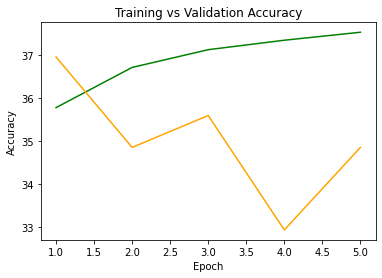

In [ ]:
import matplotlib.pyplot as plt

epochs_list = list(range(1, NUM_EPOCHS + 1))
plt.plot(epochs_list, training_acc_list, color='g')
plt.plot(epochs_list, validation_acc_list, color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()